# Keystroke Dynamics Authentication

**Biometrics Project**  done by:<br>
CB.EN.U4CSE18310 - Chandravadhana. A<br>
CB.EN.U4CSE18328 - Juvvala Hemantha Sai Sandhya<br>
CB.EN.U4CSE18333 - Akhila Kumari K<br>

<img src="files/Images/keystroke.jpg" alt="alt_text" align="left">

# Introduction

Keystroke dynamics uses analysis of keystroke patterns(i.e, how a person presses the keys) to authenticate a user.<br>
It is as a **Behavioural Biometric.**

We aim to use keystroke dynamics to provide <u>non-intrusive</u> real-time <u>authentication of users</u> during <u>proctored exams</u>.

**Capturing the ..**
* duration between 2 keypresses,
* the duration of pressing down a key, and
* the duration between the current key release and the next key press <br>

**.. can provide insights about the user.**

The next time the user logs in, by comparing his/her current typing pattern with his/her previous typing patterns, the platform can authenticate whether the logged in user is legitimate or fraudulent.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [2]:
key_df = pd.read_csv("C:\\Users\\Chandra\\Desktop\\Python Projects - Jupyter Notebook\\Biometrics_Proj\\Untitled Folder\\train.csv")
key_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,110,0,80,225,306,444,465,575,672,689,...,1638,1735,1785,1884,1928,2040,2057,2186,2284,2504
876,110,0,81,217,289,387,473,954,1057,1091,...,1755,1866,1921,2019,2161,2265,2351,2457,2561,2704
877,110,0,79,216,300,393,519,692,807,807,...,1591,1724,1763,1866,1879,2046,2048,2192,2303,2449
878,110,0,84,200,290,384,476,782,930,943,...,1537,1658,1760,1848,1831,1940,1944,2082,2174,2319


Our Target variable is 'user'.

In [3]:
test_df = pd.read_csv("C:\\Users\\Chandra\\Desktop\\Python Projects - Jupyter Notebook\\Biometrics_Proj\\Untitled Folder\\test.csv")
test_df

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,0,96,239,337,407,537,740,839,928,1047,...,1831,1951,2032,2138,2430,2496,2567,2691,2824,2919
1,0,87,248,319,515,590,734,803,912,983,...,1839,1911,2103,2174,2383,2487,2575,2647,2815,2886
2,0,90,234,312,404,512,667,767,843,940,...,1572,1675,1771,1890,1948,2043,2147,2255,2540,2683
3,0,193,240,356,407,526,607,732,712,769,...,1600,1728,1744,1832,1904,2063,2148,2258,2336,2501
4,0,74,324,394,555,629,926,1026,1194,1328,...,2626,2754,2922,3068,3154,3259,3386,3453,3618,3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,96,250,313,413,512,849,1033,933,1049,...,1785,1856,2088,2160,2422,2568,2472,2616,2682,2813
216,0,85,196,263,384,458,491,618,631,719,...,1361,1419,1456,1535,1591,1659,1727,1818,1994,2041
217,0,88,251,332,415,536,641,828,829,885,...,3931,4049,4354,4448,4593,4753,4769,4853,4889,4993
218,0,96,144,264,240,336,480,576,552,648,...,2064,2135,2256,2306,2472,2544,2520,2591,2735,2799


# Description about the Dataset

* The dataset: Keystroke dynamics challenge 1 | Kaggle has been used in the jupytr notebook. 
* This dataset captures typing attempts of **110 users**.
* Each user has **attempted 8 times** to type the string **‘united states’** and the corresponding timestamps of key **press** and **release** relative to the first key press have been captured.

Training Dataset:
* Number of rows : 880
* Number of columns : 27
* Number of users present: 110

Test Dataset:
* No. of rows in test dataset: 220
* Number of columns : 26


# Primary Observation

**Information:**<br>
Row count, data type, etc.

In [4]:
key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user        880 non-null    int64
 1   press-0     880 non-null    int64
 2   release-0   880 non-null    int64
 3   press-1     880 non-null    int64
 4   release-1   880 non-null    int64
 5   press-2     880 non-null    int64
 6   release-2   880 non-null    int64
 7   press-3     880 non-null    int64
 8   release-3   880 non-null    int64
 9   press-4     880 non-null    int64
 10  release-4   880 non-null    int64
 11  press-5     880 non-null    int64
 12  release-5   880 non-null    int64
 13  press-6     880 non-null    int64
 14  release-6   880 non-null    int64
 15  press-7     880 non-null    int64
 16  release-7   880 non-null    int64
 17  press-8     880 non-null    int64
 18  release-8   880 non-null    int64
 19  press-9     880 non-null    int64
 20  release-9   880 non-null    int6

All features are numerical data type.

Let's see how the data is distributed.

**Distribution:**

In [5]:
key_df.describe()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
count,880.000000,880.0,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,55.500000,0.0,69.740909,192.504545,280.730682,378.078409,460.992045,625.425000,719.445455,792.982955,...,1683.110227,1773.718182,1874.559091,1973.450000,2093.876136,2194.747727,2272.895455,2366.973864,2491.186364,2587.061364
std,31.771009,0.0,35.830579,118.281523,128.337586,243.485675,246.432639,359.327185,362.141729,403.595652,...,654.999470,657.806567,724.772838,725.310795,793.458930,792.913889,856.416953,856.341509,905.936922,905.291522
min,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,4.000000,14.000000,...,667.000000,763.000000,793.000000,924.000000,891.000000,1028.000000,955.000000,1055.000000,1124.000000,1188.000000
25%,28.000000,0.0,50.000000,152.000000,232.000000,281.000000,374.000000,463.000000,561.000000,592.750000,...,1288.500000,1375.000000,1433.500000,1532.500000,1589.750000,1708.000000,1741.750000,1834.250000,1930.500000,2034.500000
50%,55.500000,0.0,72.000000,192.000000,279.000000,358.000000,436.000000,569.000000,663.000000,721.500000,...,1526.000000,1618.500000,1695.000000,1791.500000,1896.000000,1994.000000,2059.500000,2151.000000,2255.500000,2344.000000
75%,83.000000,0.0,94.000000,231.250000,328.000000,424.000000,501.250000,706.500000,800.000000,888.500000,...,1921.250000,2004.000000,2145.000000,2256.000000,2390.250000,2474.500000,2585.750000,2687.250000,2823.250000,2905.750000
max,110.000000,0.0,241.000000,1287.000000,1343.000000,4333.000000,4453.000000,4823.000000,4890.000000,5191.000000,...,7377.000000,7471.000000,7663.000000,7753.000000,8006.000000,8063.000000,8189.000000,8259.000000,8422.000000,8487.000000


In [6]:
key_df.user.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110], dtype=int64)

110 Unique users typed 8 times on 12 keys

In [7]:
user1_df = key_df[key_df['user'] == 1]
user1_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
5,1,0,72,144,240,312,413,520,591,712,...,1522,1567,1770,1807,1968,2039,2160,2231,2352,2423
6,1,0,95,143,240,335,423,592,663,807,...,1615,1696,1847,1895,2063,2135,2255,2327,2423,2495
7,1,0,74,144,240,312,376,473,544,688,...,1424,1518,1664,1712,1872,1968,2091,2160,2280,2328


# Preprocessing Steps

# Check for null values

In [8]:
key_df.isnull().sum()

user          0
press-0       0
release-0     0
press-1       0
release-1     0
press-2       0
release-2     0
press-3       0
release-3     0
press-4       0
release-4     0
press-5       0
release-5     0
press-6       0
release-6     0
press-7       0
release-7     0
press-8       0
release-8     0
press-9       0
release-9     0
press-10      0
release-10    0
press-11      0
release-11    0
press-12      0
release-12    0
dtype: int64

All cells are fully filled.

# Scale down the huge values

We need to perform **Feature Scaling** on the press and release quantities since they have values in hundreds and thousands.

# Min-Max Normalization

In [9]:
col=key_df.drop(['user','press-0'],axis = 1).columns
#for i in col:
    #key_df[i]=(key_df[i]-key_df[i].min())/(key_df[i].max()-key_df[i].min())
key_df

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,110,0,80,225,306,444,465,575,672,689,...,1638,1735,1785,1884,1928,2040,2057,2186,2284,2504
876,110,0,81,217,289,387,473,954,1057,1091,...,1755,1866,1921,2019,2161,2265,2351,2457,2561,2704
877,110,0,79,216,300,393,519,692,807,807,...,1591,1724,1763,1866,1879,2046,2048,2192,2303,2449
878,110,0,84,200,290,384,476,782,930,943,...,1537,1658,1760,1848,1831,1940,1944,2082,2174,2319


# Taking just a sample with 5 users

In [10]:
noOfUsers = 5
sample_key_df = key_df[:noOfUsers*8]

In [11]:
sample_key_df.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
0,1,0,120,216,312,424,496,592,664,808,...,1712,1760,1992,2064,2376,2448,2584,2632,2752,2824
1,1,0,95,168,265,360,455,527,599,736,...,1423,1471,1664,1711,1880,1952,2039,2111,2231,2279
2,1,0,71,143,231,783,903,1087,1159,1351,...,2039,2111,2271,2343,2487,2559,2679,2751,2871,2926
3,1,0,95,144,263,353,431,760,832,1159,...,3151,3223,3415,3463,3631,3703,3815,3887,3983,4055
4,1,0,70,166,238,310,406,526,598,710,...,1310,1382,1543,1605,1734,1806,1926,1998,2086,2182


This data can’t provide useful information directly. More useful insights can be drawn only from the **time durations** between these timestamps.

<img src="files/Images/time_duration.png" alt="alt_text" align="left" style="width:525px;height:200px">

# Press Press Duration

In [13]:
PPD = sample_key_df['press-1'] - sample_key_df['press-0']
print("Time between 2 continues presses:")
PPD[0:10]

Time between 2 continues presses:


0    216
1    168
2    143
3    144
4    166
5    144
6    143
7    144
8    233
9    192
dtype: int64

# Release Press Duration

In [14]:
RPD = sample_key_df['press-1'] - sample_key_df['release-0']
print("Time between a realse of 1 key and press of other:")
RPD[0:10]

Time between a realse of 1 key and press of other:


0     96
1     73
2     72
3     49
4     96
5     72
6     48
7     70
8    145
9     96
dtype: int64

# Hold Duration

In [15]:
HD = sample_key_df['release-0'] - sample_key_df['press-0']
print("Time between a press and release of a key")
HD[0:10]

Time between a press and release of a key


0    120
1     95
2     71
3     95
4     70
5     72
6     95
7     74
8     88
9     96
dtype: int64

Each user has attempted 8 times to type the string **‘united states’** - text having 13 keys that are pressed

In [16]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
for i in range(1,13):
    sample_key_df['PPD-'+str(i)] = sample_key_df['press-'+str(i)] - sample_key_df['press-'+str(i-1)]
    sample_key_df['RPD-'+str(i)] = sample_key_df['press-'+str(i)] - sample_key_df['release-'+str(i-1)]

for i in range(13):
    sample_key_df['HD-'+str(i)] = sample_key_df['release-'+str(i)] - sample_key_df['press-'+str(i)]

In [18]:
sample_key_df.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

# Let us see user pattern using Swarmplot

**RPD time for pressing keys 'u' and 'n'**

RPD-1


Text(0.5, 1.0, 'Swarm of Release-Press Duration for users')

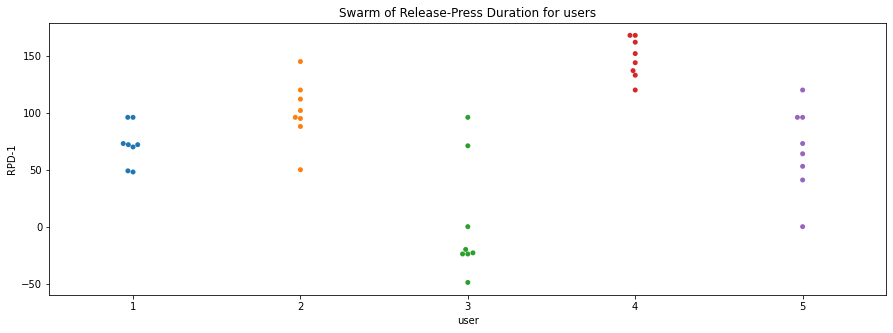

In [19]:
plt.figure(figsize=(15,5))
y='RPD-'+str(1)
print(y)
sns.swarmplot(y='RPD-'+str(1),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

**RPD time for pressing keys 'n' and 'i'**

RPD-2


Text(0.5, 1.0, 'Swarm of Release-Press Duration for users')

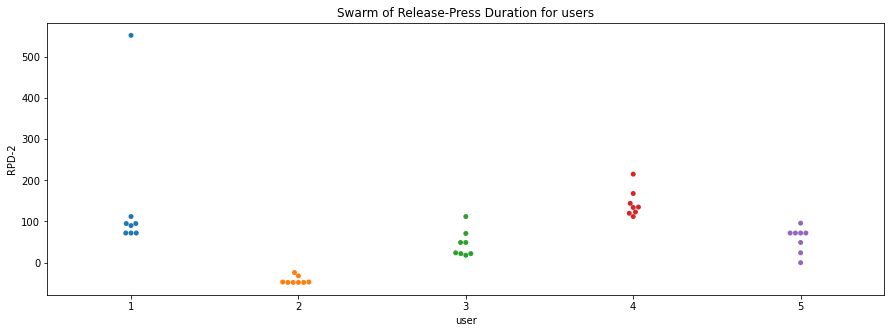

In [20]:
plt.figure(figsize=(15,5))
y='RPD-'+str(2)
print(y)
sns.swarmplot(y='RPD-'+str(2),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

# Overall Plot for the full text over 8 repetitions

**Release Press Duration**

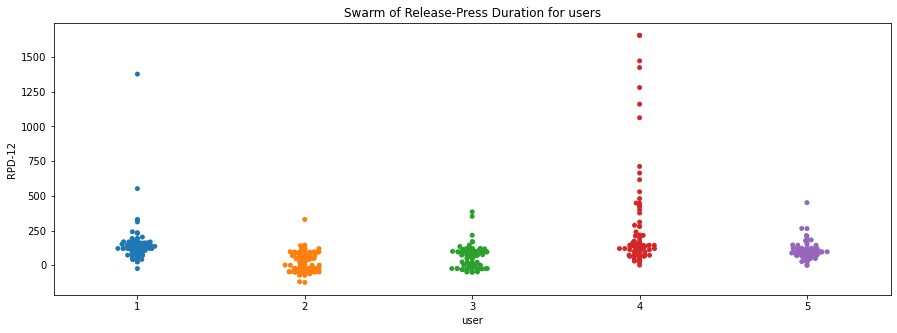

In [21]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Release-Press Duration for users')

**Inference:**<br>
We can see RPD for some users is different but for some is is similar so RDP cannot solely identify the user.

**Press Press Duration**

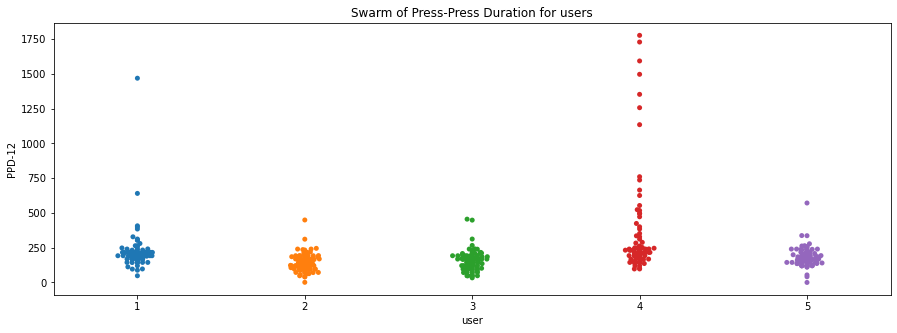

In [22]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Press-Press Duration for users')

**Inference:**<br>
Similarly PPD also fails to distinguish properly.

**Hold Duration**

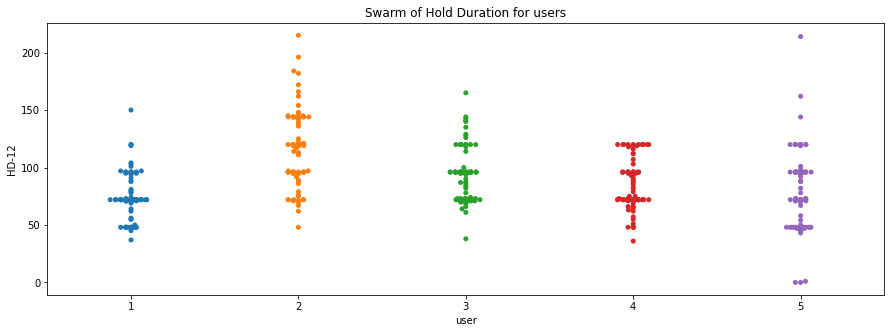

In [23]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=sample_key_df).set_title('Swarm of Hold Duration for users')

**Inference:**<br>
Now, Hold duration shows a different analysis. We can see that people tend to differ in their hold duration which means people take different time duration to press a particular key.

# We need to change dimensions in order to analyze the typing patterns across users

**Press Press Duration**

In [24]:
drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = sample_key_df.drop(columns=drop_cols_PPD_analysis)
#print(trainDF_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_PPD_analysis

user  press-  PPD-
id key_no                    
0  1          1     216   216
   2          1     424   208
   3          1     592   168
   4          1     808   216
   5          1    1000   192
...         ...     ...   ...
39 8          5    1267   149
   9          5    1420   153
   10         5    1574   154
   11         5    1710   136
   12         5    1950   240

[480 rows x 3 columns]

In [25]:
trainDF_PPD_analysis.iloc[0:15]

user  press-  PPD-
id key_no                    
0  1          1     216   216
   2          1     424   208
   3          1     592   168
   4          1     808   216
   5          1    1000   192
   6          1    1304   304
   7          1    1496   192
   8          1    1712   216
   9          1    1992   280
   10         1    2376   384
   11         1    2584   208
   12         1    2752   168
1  1          1     168   168
   2          1     360   192
   3          1     527   167

In [26]:
trainDF_PPD_analysis.iloc[380:480]

user  press-  PPD-
id key_no                    
31 9          4    2487   495
   10         4    2727   240
   11         4    3055   328
   12         4    3680   625
32 1          5     168   168
...         ...     ...   ...
39 8          5    1267   149
   9          5    1420   153
   10         5    1574   154
   11         5    1710   136
   12         5    1950   240

[100 rows x 3 columns]

# Plotting the Press Press Durations v/s Press Timestamps

Text(0.5, 1.0, 'Line plots for each key sequence')

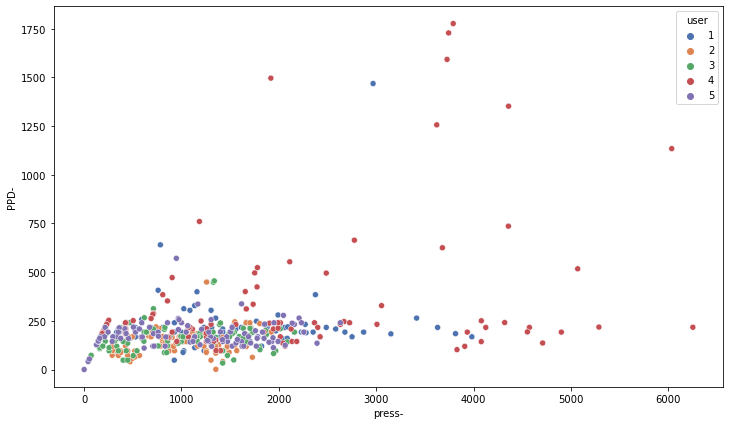

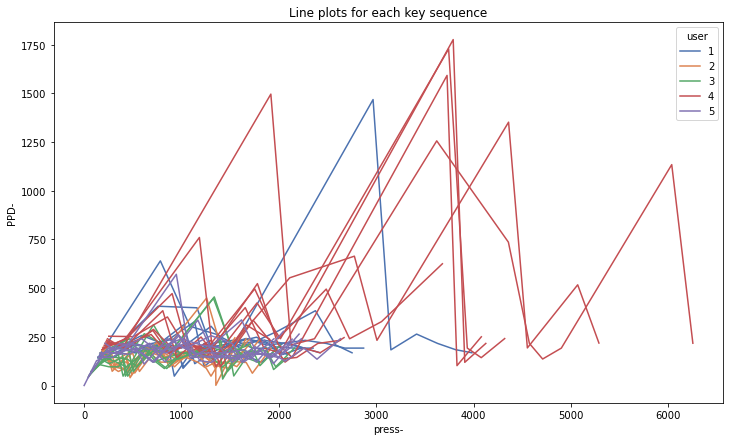

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

plt.figure(figsize=(12,7))
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [28]:
sample_key_df.columns

Index(['user', 'press-0', 'release-0', 'press-1', 'release-1', 'press-2',
       'release-2', 'press-3', 'release-3', 'press-4', 'release-4', 'press-5',
       'release-5', 'press-6', 'release-6', 'press-7', 'release-7', 'press-8',
       'release-8', 'press-9', 'release-9', 'press-10', 'release-10',
       'press-11', 'release-11', 'press-12', 'release-12', 'PPD-1', 'RPD-1',
       'PPD-2', 'RPD-2', 'PPD-3', 'RPD-3', 'PPD-4', 'RPD-4', 'PPD-5', 'RPD-5',
       'PPD-6', 'RPD-6', 'PPD-7', 'RPD-7', 'PPD-8', 'RPD-8', 'PPD-9', 'RPD-9',
       'PPD-10', 'RPD-10', 'PPD-11', 'RPD-11', 'PPD-12', 'RPD-12', 'HD-0',
       'HD-1', 'HD-2', 'HD-3', 'HD-4', 'HD-5', 'HD-6', 'HD-7', 'HD-8', 'HD-9',
       'HD-10', 'HD-11', 'HD-12'],
      dtype='object')

# Release Press Duration Analysis

In [29]:
drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['press-0'] + ['release-0']

trainDF_RPD_analysis = sample_key_df.drop(columns=drop_cols_RPD_analysis)
#print(trainDF_PPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','release-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RPD_analysis

user  press-  release-  RPD-
id key_no                              
0  1          1     216       312    96
   2          1     424       496   112
   3          1     592       664    96
   4          1     808       856   144
   5          1    1000      1072   144
...         ...     ...       ...   ...
39 8          5    1267      1310    77
   9          5    1420      1502   110
   10         5    1574      1646    72
   11         5    1710      1806    64
   12         5    1950      2023   144

[480 rows x 4 columns]

Text(0.5, 1.0, 'Line plots for each key sequence')

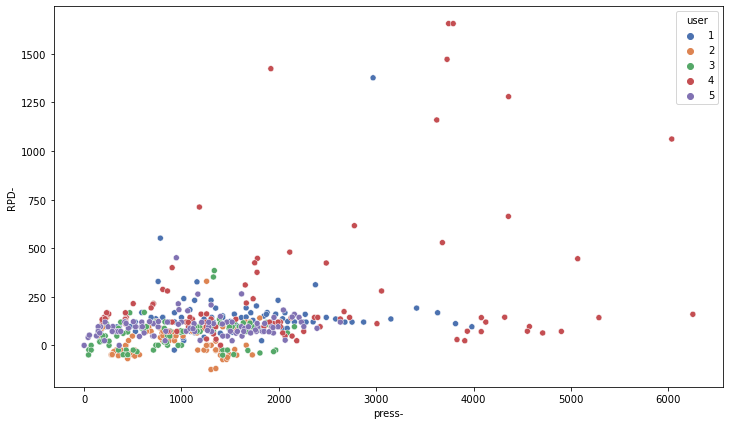

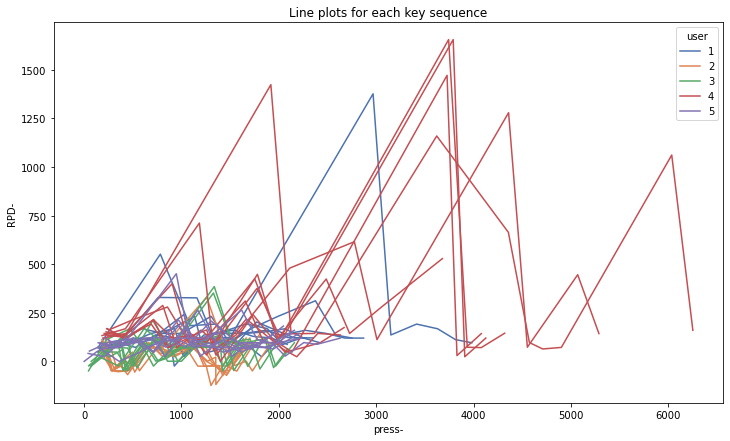

In [30]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

plt.figure(figsize=(12,7))
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

# Hold Duration Analysis

In [31]:
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-0'] + ['press-0'] + ['HD-0']

trainDF_HD_analysis = sample_key_df.drop(columns=drop_cols_HD_analysis)
#print(trainDF_PPD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','release-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

user  press-  release-  HD-
id key_no                             
0  1          1     216       312   96
   2          1     424       496   72
   3          1     592       664   72
   4          1     808       856   48
   5          1    1000      1072   72
...         ...     ...       ...  ...
39 8          5    1267      1310   43
   9          5    1420      1502   82
   10         5    1574      1646   72
   11         5    1710      1806   96
   12         5    1950      2023   73

[480 rows x 4 columns]

Text(0.5, 1.0, 'Line plots for each key sequence')

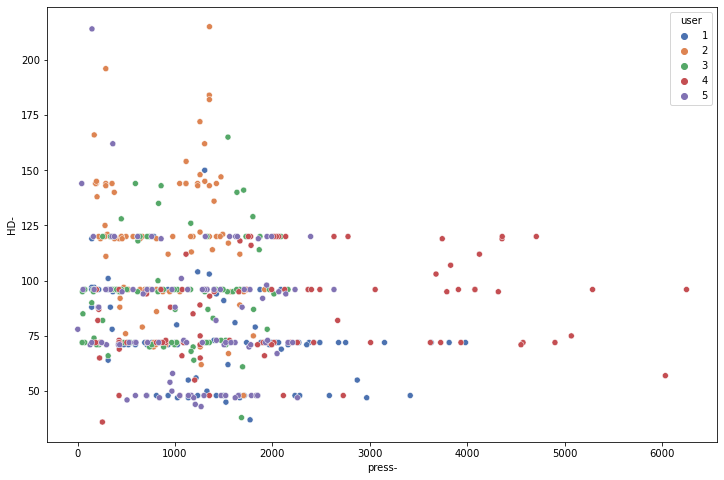

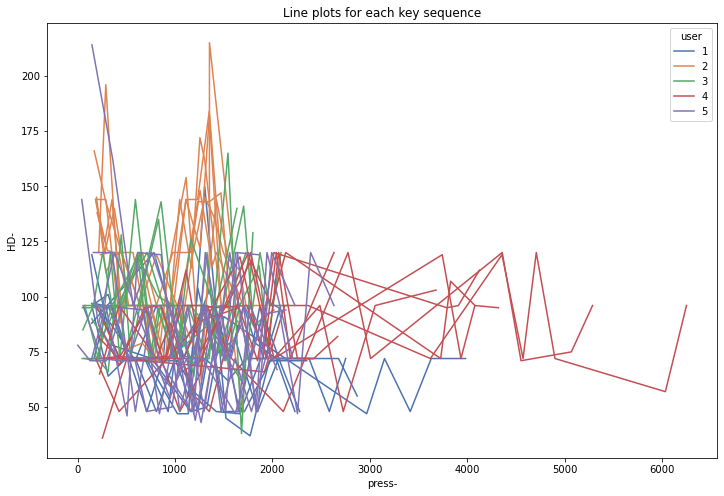

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

plt.figure(figsize=(12,8))
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [33]:
trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-','release-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined

user  press-  release-  HD-  RPD-  PPD-
id key_no                                         
0  1          1     216       312   96    96   216
   2          1     424       496   72   112   208
   3          1     592       664   72    96   168
   4          1     808       856   48   144   216
   5          1    1000      1072   72   144   192
...         ...     ...       ...  ...   ...   ...
39 8          5    1267      1310   43    77   149
   9          5    1420      1502   82   110   153
   10         5    1574      1646   72    72   154
   11         5    1710      1806   96    64   136
   12         5    1950      2023   73   144   240

[480 rows x 6 columns]